In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
%matplotlib inline
import matplotlib
sns.set_style('ticks')

In [2]:
df = pd.read_csv('german_credit_data.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df.shape
# Determine the numbers of NaN value in each column by percentage
(df.isnull().sum()/df.shape[0])*100
# 18.3 % of rows in Saving Accounts columns has NaN values
# 39.4% of rows in Checking account columns has NaN values

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

In [4]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


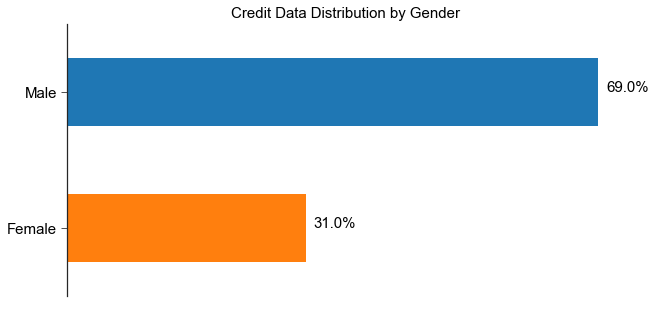

In [5]:
f, ax = plt.subplots()
ax = df.Sex.value_counts().plot(kind='barh',figsize = (10,5))
kwarg ={'fontsize':15,'color':'black'}
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.25,
           str((i.get_width()/len(df.Sex))*100)+'%',**kwarg)
ax.invert_yaxis()  
ax.set_yticklabels(['Male','Female'],**kwarg)
x_axis = ax.axes.get_xaxis().set_visible(False) # turn off the x axis label
ax.set_title('Credit Data Distribution by Gender',**kwarg)
sns.despine(bottom=True)
plt.show()

The graph above shows that the number of Male in dataset surpasses the female with a ratio of 2:1

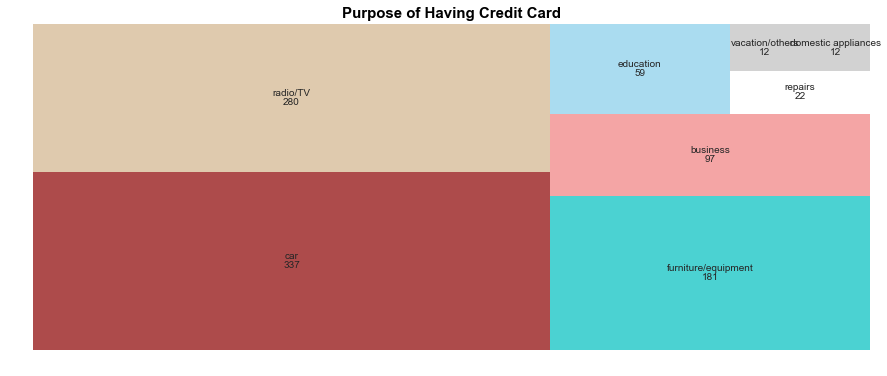

In [6]:
count = df.Purpose.value_counts().values
label = df.Purpose.value_counts().index
color= ['darkred','tan','c','lightcoral','skyblue','w','silver','silver']
norm = matplotlib.colors.Normalize(vmin=min(count), vmax=max(count))
colors = [matplotlib.cm.Oranges_r(norm(value)) for value in count]
#Plot the Treemap
f, ax = plt.subplots(figsize=(15,6))
ax = squarify.plot(sizes = count,label=label,color=color,alpha=0.7,value=count)
plt.axis('off')
ax.set_title('Purpose of Having Credit Card',color='black',weight='bold', size=15)
plt.show()

#### Categozising the Age distribution by Age Generation

In [7]:
range_list = (18,35,45,65,80)
cat = ['Millennials','Gen_X','Baby_Boomer','Silent_Gen']
df['Age_Gen'] = pd.cut(df.Age,range_list,labels=cat)

In [8]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Gen
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Silent_Gen
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Millennials
2,49,male,1,own,little,NaN,2096,12,education,good,Baby_Boomer
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Gen_X
4,53,male,2,free,little,little,4870,24,car,bad,Baby_Boomer


In [9]:
#Divide the dataset by Gender
male_data = df[df.Sex == 'male']
female_data=df[df.Sex =='female']

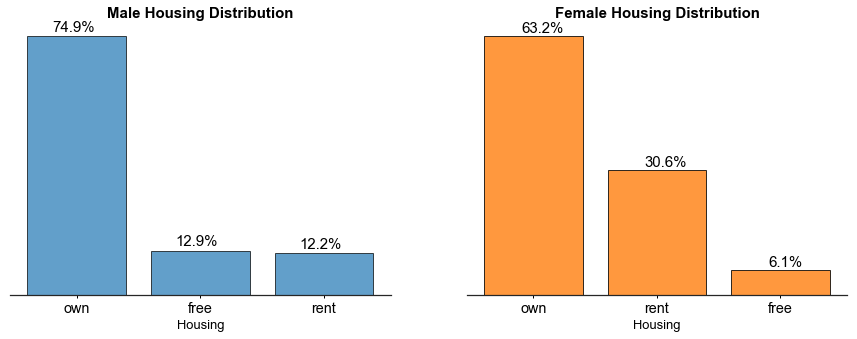

In [10]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax2.bar(female_data.Housing.value_counts().index,female_data.Housing.value_counts().values,alpha=.8, 
        ec='black',color='#ff7f0e')
ax1.bar(male_data.Housing.value_counts().index,male_data.Housing.value_counts().values,alpha=0.7,
        ec='black', color='#1f77b4')
fsum = female_data.Housing.value_counts().values.sum()
msum = male_data.Housing.value_counts().values.sum()
kwargs= {'fontsize':13, 'color':'black'}
for i in ax1.patches:
    ax1.text(i.get_x()+0.2, i.get_height()+10, str(round(((i.get_height())/msum)*100,1))+'%', **kwarg)
for i in ax2.patches:
    ax2.text(i.get_x()+0.3, i.get_height()+3, str(round(((i.get_height())/fsum)*100,1))+'%', **kwarg)
    
ax1.set_xlabel('Housing',**kwargs)
ax2.set_xlabel('Housing',**kwargs)
ax1.tick_params(length=3, width=1, colors='black',labelsize='x-large')
ax2.tick_params(length=3, width=1, colors='black',labelsize='x-large')
y_axis = ax1.axes.get_yaxis().set_visible(False) # turn off the y axis label
y_axis = ax2.axes.get_yaxis().set_visible(False) # turn off the y axis label
ax1.set_title('Male Housing Distribution',color='black',weight='bold', size=15)
ax2.set_title('Female Housing Distribution',color='black',weight='bold', size=15)

sns.despine(left=True)
plt.show()

### Age Distribution using density plot

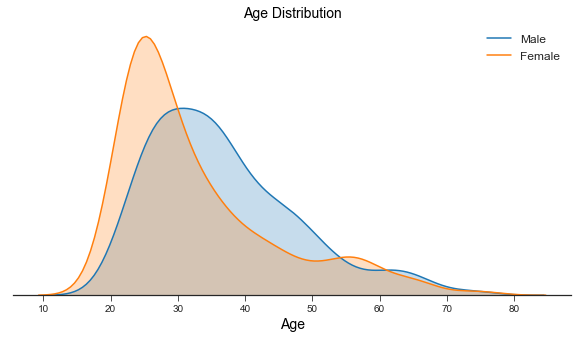

In [11]:
f, ax = plt.subplots(figsize = (10,5))
ax = sns.kdeplot(male_data.Age,shade=True)
ax = sns.kdeplot(female_data.Age,shade=True)
ax.legend(['Male','Female'],fontsize=12)
ax.set_xlabel('Age',fontsize=14,color='black')

ax.set_title('Age Distribution',color='black',fontsize=14)
y_axis = ax.axes.get_yaxis().set_visible(False) # turn off the y axis label
sns.despine(left=True)

The graph above shows that the female coustomer tend to be younger than the male. This graph also shows that for both male and female, the majority of the customers are Millennials (less than 35 years old)

### Distribution of credit card based on Skillset

In [12]:
# DataFrame by Job percentage
female_job_pct = pd.DataFrame(round(female_data.Job.value_counts()/len(female_data.Job)*100,1)).reset_index()
female_job_pct.columns = ['Job','female_pct']
# Male DataFrame for the Job percentage
male_job_pct = pd.DataFrame(round(male_data.Job.value_counts()/len(male_data.Job)*100,1)).reset_index()
male_job_pct.columns = ['Job','male_pct']
# Joining the DataFrame together
job_pct = pd.merge(female_job_pct,male_job_pct,how='left')
job_pct.Job = job_pct['Job'].map({0:'Unskilled & Non Resident',1:'Unskilled & Resident',2:'Skilled',3:'Highly Skilled'})
job_pct

,Job,female_pct,male_pct
0,Skilled,63.5,62.8
1,Unskilled & Resident,20.6,19.7
2,Highly Skilled,11.9,16.1
3,Unskilled & Non Resident,3.9,1.4


#### The graph below show that the female customer are highly skilled than men by over 2:1 ratio and they are almost equal to men in other skill set category

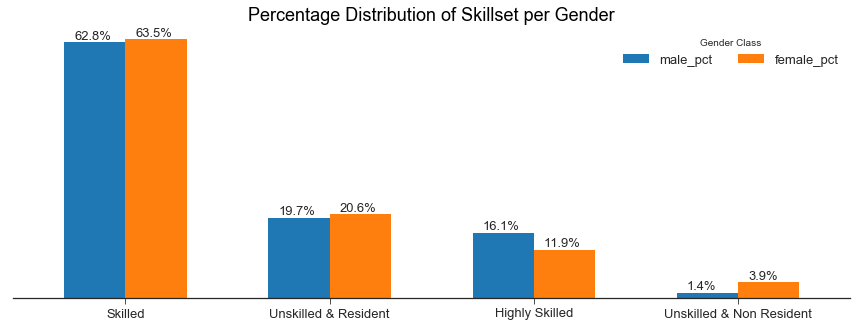

In [13]:
ax = job_pct[['male_pct','female_pct']].plot(kind='bar',figsize=(15,5),fontsize=13,width=0.6)
ax.set_xticklabels(job_pct.Job.tolist(),rotation=0)
ax.set_title('Percentage Distribution of Skillset per Gender',fontsize=18,color='black')
for i in ax.patches:
    ax.text(i.get_x()+0.05, i.get_height()+0.8, str((i.get_height()))+'%', fontsize=13)
y_axis = ax.axes.get_yaxis().set_visible(False) # turn off the y axis label
plt.legend(loc=('upper right'),fontsize=13,title ='Gender Class',ncol=2)
sns.despine(left=True)

The graph Below shows that the eventhough the number of male customers is higher than the female, the reason of having a credit card based on skillset is normaly distributed

## Skilled EDA

In [14]:
df_skm2= male_data[male_data.Job==2].Purpose.value_counts().sort_values()
df_skf2 = female_data[female_data.Job==2].Purpose.value_counts().sort_values()
df_skm3= male_data[male_data.Job==3].Purpose.value_counts().sort_values()
df_skf3 = female_data[female_data.Job==3].Purpose.value_counts().sort_values()

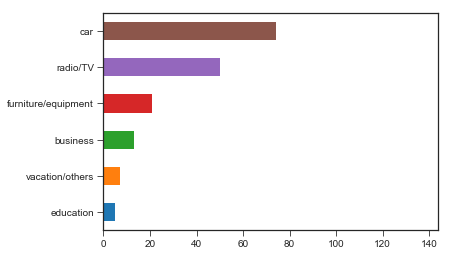

In [15]:
df_skm2.plot(kind='barh')
df_skm3.plot(kind='barh')

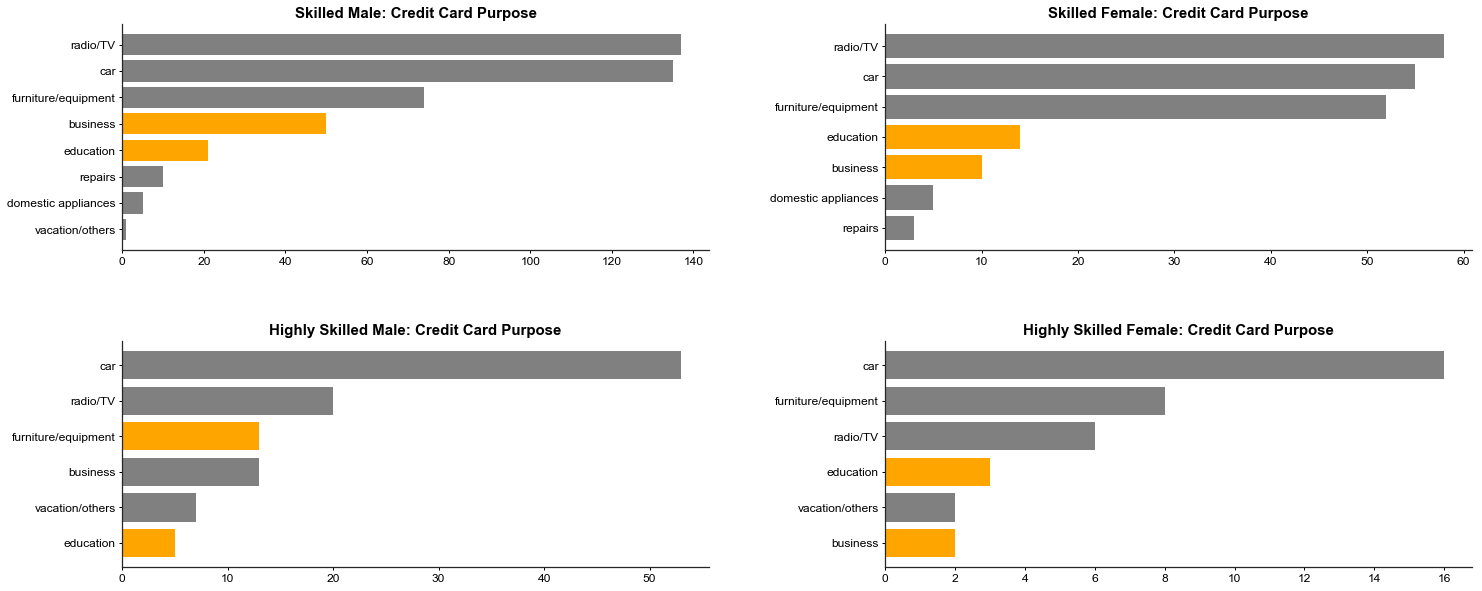

In [16]:
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10))
## Color for each bar
skm2_color=['grey','grey','grey','orange','orange','grey','grey','grey']
skf2_color=['grey','grey','orange','orange','grey','grey','grey']
skm3_color=['orange','grey','grey','orange','grey','grey','grey','grey']
skf3_color=['orange','grey','orange','grey','grey','grey','grey']
#Graph for each Category
ax1.barh(df_skm2.index,df_skm2.values,color=skm2_color)
ax2.barh(df_skf2.index,df_skf2.values,color=skf2_color)
ax3.barh(df_skm3.index,df_skm3.values,color=skm3_color)
ax4.barh(df_skf3.index,df_skf3.values,color=skf3_color)
#x_axis = ax1.axes.get_xaxis().set_visible(False)
#x_axis = ax2.axes.get_xaxis().set_visible(False)
#Customize font on the y axis
kwargs= {'length':3, 'width':1, 'colors':'black','labelsize':'large'}
f.subplots_adjust(wspace=0.3,right=2,hspace=0.4)
ax1.tick_params(**kwargs)
ax2.tick_params(**kwargs)
ax3.tick_params(**kwargs)
ax4.tick_params(**kwargs)
#Title on each plot
arg = {'color':'black','fontsize':15,'weight':'bold'}
ax1.set_title('Skilled Male: Credit Card Purpose',**arg)
ax2.set_title('Skilled Female: Credit Card Purpose',**arg)
ax3.set_title('Highly Skilled Male: Credit Card Purpose',**arg)
ax4.set_title('Highly Skilled Female: Credit Card Purpose',**arg)
sns.despine(bottom=False)

Female tend to prioritize Education over Business, which is opposite for the men who significantly priotize Business over Education in both High skilled and Skilled category

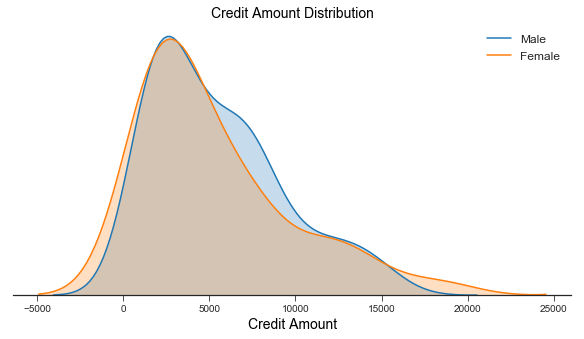

In [17]:
f, ax = plt.subplots(figsize = (10,5))
ax = sns.kdeplot(male_data[male_data.Job==3]['Credit amount'],shade=True)
ax = sns.kdeplot(female_data[female_data.Job==3]['Credit amount'],shade=True)
ax.legend(['Male','Female'],fontsize=12)
ax.set_xlabel('Credit Amount',fontsize=14,color='black')
ax.set_title('Credit Amount Distribution',color='black',fontsize=14)
y_axis = ax.axes.get_yaxis().set_visible(False) # turn off the y axis label
sns.despine(left=True)

## Female Risk Evaluation

In [18]:
female_risk = female_data.groupby(['Risk','Job']).size().reset_index()
female_risk.columns = ['Risk','Job','count']
female_risk.Job=female_risk.Job.map({0:'Unskilled & Non Resident',1:'Unskilled & Resident',2:'Skilled',3:'Highly Skilled'})
female_risk

,Risk,Job,count
0,bad,Unskilled & Non Resident,5
1,bad,Unskilled & Resident,22
2,bad,Skilled,66
3,bad,Highly Skilled,16
4,good,Unskilled & Non Resident,7
5,good,Unskilled & Resident,42
6,good,Skilled,131
7,good,Highly Skilled,21


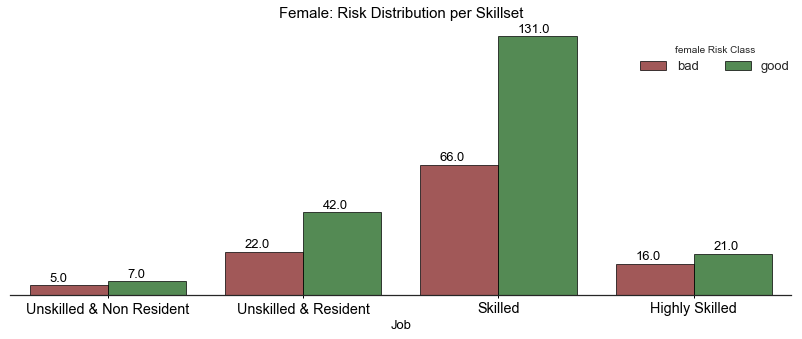

In [19]:
f, ax=plt.subplots(figsize=(14,5))
ax = sns.barplot(x='Job',y= 'count',data=female_risk,hue='Risk',palette=['darkred', 'darkgreen'],alpha=0.7,
                edgecolor="black")
ax.set_title('Female: Risk Distribution per Skillset',fontsize=15,color='black')
ax.tick_params(length=3, width=1, colors='black',labelsize='x-large')
ax.set_xlabel('Job',fontsize=13,color='black')
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+2.2, str((i.get_height())), fontsize=13,color='black')
y_axis = ax.axes.get_yaxis().set_visible(False) # turn off the y axis label
plt.legend(loc=(0.8,0.8),fontsize=13,title ='female Risk Class',ncol=2)
sns.despine(left=True)

## Male Risk Evaluation

In [20]:
male_risk = male_data.groupby(['Risk','Job']).size().reset_index()
male_risk.columns = ['Risk','Job','count']
male_risk.Job= male_risk.Job.map({0:'Unskilled & Non Resident',1:'Unskilled & Resident',2:'Skilled',3:'Highly Skilled'})
male_risk

,Risk,Job,count
0,bad,Unskilled & Non Resident,2
1,bad,Unskilled & Resident,34
2,bad,Skilled,120
3,bad,Highly Skilled,35
4,good,Unskilled & Non Resident,8
5,good,Unskilled & Resident,102
6,good,Skilled,313
7,good,Highly Skilled,76


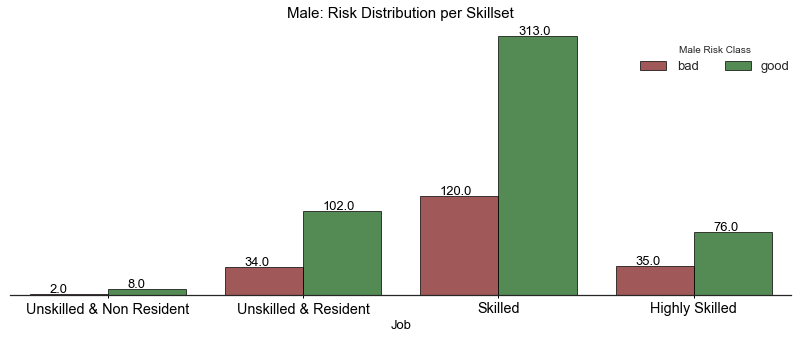

In [21]:
f, ax=plt.subplots(figsize=(14,5))
ax = sns.barplot(x='Job',y= 'count',data= male_risk,hue='Risk',palette=['darkred', 'darkgreen'],alpha=0.7,
                edgecolor="black")
ax.set_title('Male: Risk Distribution per Skillset',fontsize=15,color='black')
ax.tick_params(length=3, width=1, colors='black',labelsize='x-large')
ax.set_xlabel('Job',fontsize=13,color='black')
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+2.2, str((i.get_height())), fontsize=13,color='black')
y_axis = ax.axes.get_yaxis().set_visible(False) # turn off the y axis label
plt.legend(loc=(0.8,0.8),fontsize=13,title ='Male Risk Class',ncol=2)
sns.despine(left=True)

### Create a new Column that convert Duration from months to Years (category type)  

In [22]:
range_list = (1,12,24,36,48,60,72)
cat = ['One','Two','Three','Four','Five','Six']
df['Duration_yrs']= pd.cut(df.Duration,range_list,labels=cat)

In [23]:
#Create a dataframe of only Sex, Duration_yrs and risk
df_duration_yrs = df.groupby(['Sex','Duration_yrs','Risk']).size().reset_index()
df_duration_yrs.columns = ['Sex','Duration_yrs','Risk','count']
# Split the New dataset df_duration_yrs by Gender
ms = df_duration_yrs[df_duration_yrs['Sex']=='male']
fs = df_duration_yrs[df_duration_yrs['Sex']=='female']

In [24]:
#Male dataframe for risk distribution
dd = pd.DataFrame(ms[ms['Risk']=='bad']['Duration_yrs'].values.tolist())
dd['bad']= ms[ms['Risk']=='bad']['count'].values.tolist()
xc = ms[ms['Risk']=='good']['count'].values.tolist()
# Added 0 to the list so the list will have same lenght with dd
xc.append(0)
dd['good'] = xc
dd.columns = ['Duration_yrs', 'bad','good']
dd_f = pd.DataFrame(fs[fs['Risk']=='bad']['Duration_yrs'].values.tolist())
dd_f['bad']= fs[fs['Risk']=='bad']['count'].values.tolist()
dd_f['good']= fs[fs['Risk']=='good']['count'].values.tolist()
dd_f.columns = ['Duration_yrs', 'bad','good']

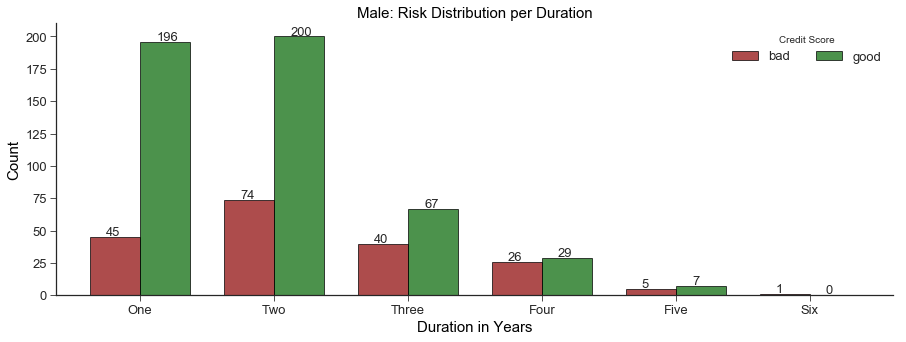

In [25]:
ax = dd[['bad','good']].plot(kind='bar',figsize=(15,5),fontsize=13,color=['darkred', 'darkgreen'],alpha=0.7,
                             ec='black',width=0.75)
ax.set_xticklabels(dd.Duration_yrs.tolist(),rotation=0)
for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()+1.2, str((i.get_height())), fontsize=13)
kwarg = {'fontsize': 15, 'color':'black'}
ax.set_ylabel('Count',**kwarg)
ax.set_xlabel('Duration in Years',**kwarg)
ax.set_title('Male: Risk Distribution per Duration',**kwarg)
plt.legend(loc=('upper right'),fontsize=13,title ='Credit Score',ncol=2)
sns.despine(left=False)

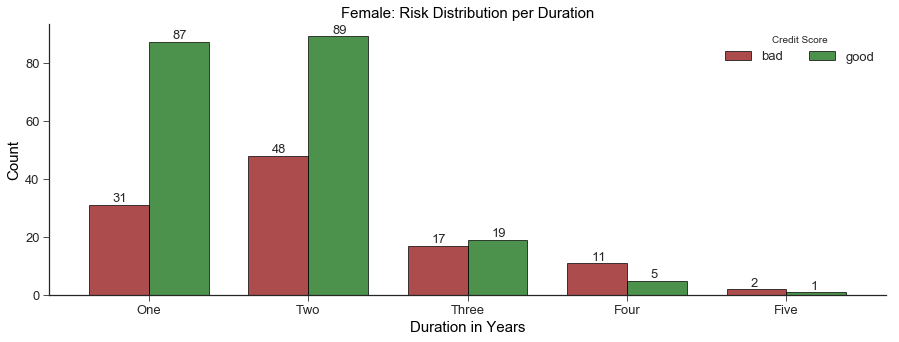

In [26]:
ax = dd_f[['bad','good']].plot(kind='bar',figsize=(15,5),fontsize=13,color=['darkred', 'darkgreen'],alpha=0.7,
                               ec='black',width=0.75)
ax.set_xticklabels(dd.Duration_yrs.tolist(),rotation=0)
for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+1.2, str((i.get_height())), fontsize=13)
#y_axis = ax.axes.get_yaxis().set_visible(False) # turn off the y axis label
kwarg = {'fontsize': 15, 'color':'black'}
ax.set_ylabel('Count',**kwarg)
ax.set_xlabel('Duration in Years',**kwarg)
ax.set_title('Female: Risk Distribution per Duration',**kwarg)
plt.legend(loc=('upper right'),fontsize=13,title ='Credit Score',ncol=2)
sns.despine(left=False)

In [27]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

In [28]:
ms[ms['Risk']=='bad']['count'].values
ms[ms['Risk']=='bad']['Duration_yrs'].values
ms[ms['Risk']=='bad']

,Sex,Duration_yrs,Risk,count
10,male,One,bad,45
12,male,Two,bad,74
14,male,Three,bad,40
16,male,Four,bad,26
18,male,Five,bad,5
20,male,Six,bad,1


In [29]:
trace1 = go.Bar(
    x=ms[ms['Risk']=='bad']['Duration_yrs'].values,
    y= ms[ms['Risk']=='bad']['count'].values,
    marker=dict(
    color='rgb(139,0,0)'),
    opacity=0.8,
    name = 'Bad Risk'
)
trace2 = go.Bar(
    x=ms[ms['Risk']=='good']['Duration_yrs'].values,
    y= ms[ms['Risk']=='good']['count'].values, 
    marker=dict(
    color='rgb(0,100,0)'),
    opacity=0.8,
    name = 'Good Risk'
)
data = [trace1, trace2]

layout = go.Layout (
    yaxis = dict(
    title = 'Frequency'),
    
    xaxis = dict (
    title = 'Duration in Years'),
    
    title = 'Male: Risk Distribution per Duration'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)

In [30]:
trace1 = go.Bar(
    x=fs[fs['Risk']=='bad']['Duration_yrs'].values,
    y= fs[fs['Risk']=='bad']['count'].values,
    marker=dict(
    color='rgb(139,0,0)'),
    opacity=0.8,
    name = 'Bad Risk'
)
trace2 = go.Bar(
    x=fs[fs['Risk']=='good']['Duration_yrs'].values,
    y= fs[fs['Risk']=='good']['count'].values, 
    marker=dict(
    color='rgb(0,100,0)'),
    opacity=0.8,
    name = 'Good Risk'
)
data = [trace1, trace2]

layout = go.Layout (
    yaxis = dict(
    title = 'Frequency'),
    
    xaxis = dict (
    title = 'Duration in Years'),
    
    title = 'Female: Risk Distribution per Duration'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)

In [31]:
df_r = df.groupby(['Sex','Job','Housing']).size().reset_index()
df_r.columns = ['Sex','Job','Housing','count']
df_r.Job=df_r.Job.map({0:'Unskilled & Non Resident',1:'Unskilled & Resident',2:'Skilled',3:'Highly Skilled'})
df_r.head()

,Sex,Job,Housing,count
0,female,Unskilled & Non Resident,free,1
1,female,Unskilled & Non Resident,own,6
2,female,Unskilled & Non Resident,rent,5
3,female,Unskilled & Resident,free,4
4,female,Unskilled & Resident,own,42


In [32]:
fsh = df_r[df_r['Sex']=='female']

In [33]:
msh = df_r[df_r['Sex']=='male']

In [34]:
trace1 = go.Bar(
    x=fsh[fsh['Housing']=='free']['Job'].values,
    y= fsh[fsh['Housing']=='free']['count'].values,
    opacity=0.8,
    name = 'Free'
)
trace2 = go.Bar(
    x=fsh[fsh['Housing']=='rent']['Job'].values,
    y= fsh[fsh['Housing']=='rent']['count'].values, 
    opacity=0.8,
    name = 'Rent'
)
trace3 = go.Bar(
    x=fsh[fsh['Housing']=='own']['Job'].values,
    y= fsh[fsh['Housing']=='own']['count'].values, 
    opacity=0.8,
    name = 'own'
)
data = [trace1, trace2,trace3]

layout = go.Layout (
    yaxis = dict(
    title = 'Frequency'),
    
    xaxis = dict (
    title = 'Housing'),
    
    title = 'Female: Housing Distribution per Skillset'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)

In [35]:
trace1 = go.Bar(
    x=msh[msh['Housing']=='free']['Job'].values,
    y= msh[msh['Housing']=='free']['count'].values,
    opacity=0.8,
    name = 'Free'
)
trace2 = go.Bar(
    x=msh[msh['Housing']=='rent']['Job'].values,
    y= msh[msh['Housing']=='rent']['count'].values, 
    opacity=0.8,
    name = 'Rent'
)
trace3 = go.Bar(
    x=msh[msh['Housing']=='own']['Job'].values,
    y= msh[msh['Housing']=='own']['count'].values, 
    opacity=0.8,
    name = 'own'
)
data = [trace1, trace2,trace3]

layout = go.Layout (
    yaxis = dict(
    title = 'Frequency'),
    
    xaxis = dict (
    title = 'Housing'),
    
    title = 'Male: Housing Distribution per Skillset'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)